In [1]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u) #stateVector
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q #covMat 
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

def example():
	dt = 1.0/60
	F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
	H = np.array([1, 0, 0]).reshape(1, 3)
	Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
	R = np.array([0.5]).reshape(1, 1)

	x = np.linspace(-10, 10, 100)
	measurements = - (x**2 + 2*x - 2)  + np.random.normal(0, 2, 100)

	kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
	predictions = []

	for z in measurements:
		predictions.append(np.dot(H,  kf.predict())[0])
		kf.update(z)

	import matplotlib.pyplot as plt
	plt.plot(range(len(measurements)), measurements, label = 'Measurements')
	plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
	plt.legend()
	plt.show()

if __name__ == '__main__':
    example()

<Figure size 640x480 with 1 Axes>

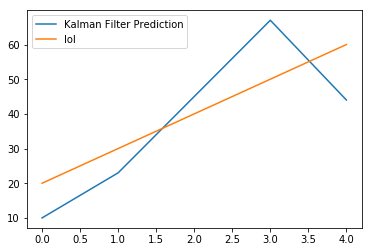

In [2]:
import matplotlib.pyplot as plt
plt.plot(range(5), np.array([10,23,45,67,44]), label = 'Kalman Filter Prediction')
plt.plot(range(5), np.array([20,30,40,50,60]), label = 'lol')
plt.legend()
plt.show()

In [3]:
np.linspace(-10, 10, 100)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [4]:
#---------------------4-target passive sonar scenario description for 1-D tracking------------
#dataset in txt file
#import csv
#with open('TargetPositions.txt') as f:
#    reader = csv.reader(f, delimiter='\t')
#    data = [(col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col14, col15, col16) for col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col14, col15, col16 in reader]
import pandas as pd
X = pd.read_csv('TargetPositions.txt', sep='\s+', header=None)             
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0.00000,30889.00,0,15935.00,13302.00,0,-7804.00,13302.0,0,-1698.00,-10000.00,0,0.0000,0.00000,0
1,4,0.00000,30910.20,0,15935.00,13327.40,0,-7804.00,13347.2,0,-1698.00,-9974.72,0,11.2763,4.10424,0
2,8,9.07372,30891.00,0,15912.90,13314.90,0,-7758.84,13347.2,0,-1710.74,-9952.88,0,22.5526,8.20848,0
3,12,18.14740,30871.80,0,15890.80,13302.30,0,-7713.68,13347.2,0,-1723.47,-9931.04,0,33.8289,12.31270,0
4,16,27.22120,30852.60,0,15868.70,13289.80,0,-7668.52,13347.2,0,-1736.21,-9909.21,0,45.1052,16.41700,0
5,20,36.29490,30833.40,0,15846.60,13277.20,0,-7623.36,13347.2,0,-1748.94,-9887.37,0,56.3816,20.52120,0
6,24,45.36860,30814.20,0,15824.60,13264.70,0,-7578.20,13347.2,0,-1761.68,-9865.53,0,67.6579,24.62540,0
7,28,54.44230,30795.00,0,15802.50,13252.20,0,-7533.04,13347.2,0,-1774.41,-9843.69,0,78.9342,28.72970,0
8,32,63.51610,30775.80,0,15780.40,13239.60,0,-7487.88,13347.2,0,-1787.15,-9821.85,0,90.2105,32.83390,0
9,36,72.58980,30756.60,0,15758.30,13227.10,0,-7442.72,13347.2,0,-1799.88,-9800.02,0,101.4870,36.93820,0


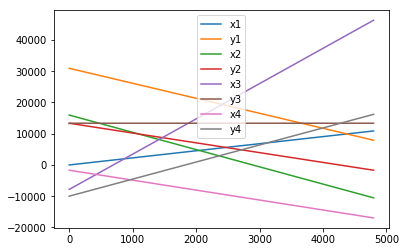

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(0,4797,4), np.array(list(X[1])), label = 'x1')
plt.plot(range(0,4797,4), np.array(list(X[2])), label = 'y1')
plt.plot(range(0,4797,4), np.array(list(X[4])), label = 'x2')
plt.plot(range(0,4797,4), np.array(list(X[5])), label = 'y2')
plt.plot(range(0,4797,4), np.array(list(X[7])), label = 'x3')
plt.plot(range(0,4797,4), np.array(list(X[8])), label = 'y3')
plt.plot(range(0,4797,4), np.array(list(X[10])), label = 'x4')
plt.plot(range(0,4797,4), np.array(list(X[11])), label = 'y4')
plt.legend()
plt.show()